## Healthcare Test Results Classification

In [5]:
!pip install category_encoders

### Imports

In [6]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [7]:
file_path = '/content/train data.csv'

In [8]:
df = pd.read_csv(file_path)

### Studying The Dataset

In [9]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,49276.000000,50000.000000
mean,25000.500000,45.863700,5397.314987,282.999980
std,14433.901067,24.416119,3240.601901,109.993534
min,1.000000,0.000000,-995.211704,50.000000
25%,12500.750000,26.000000,2645.811489,203.000000
50%,25000.500000,45.000000,5313.507889,286.000000
75%,37500.250000,65.000000,8027.205893,370.000000
max,50000.000000,100.000000,12635.764460,500.000000


In [10]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [11]:
# check null values in the dataset
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Blood Type,3065
Medical Condition,0
Date of Admission,0
Doctor,804
Hospital,959
Insurance Provider,293


In [12]:
# Impute missing values of blood type using mode
df['Blood Type'].fillna(df['Blood Type'].mode()[0], inplace=True)

<ipython-input-12-9f5dca0c6c19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood Type'].fillna(df['Blood Type'].mode()[0], inplace=True)


In [13]:
df['Blood Type'].isnull().sum()

np.int64(0)

In [14]:
df['Blood Type'].unique()

array(['O-', 'A+', 'AB-', 'B-', 'O+', 'A-', 'AB+', 'B+'], dtype=object)

In [15]:
df['Blood Type'].head()

,Blood Type
0,O-
1,O-
2,A+
3,AB-
4,A+


In [16]:
df['Doctor'].fillna(df['Doctor'].mode()[0], inplace=True)

<ipython-input-16-fb69e38614fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Doctor'].fillna(df['Doctor'].mode()[0], inplace=True)


In [17]:
df['Doctor'].isnull().sum()

np.int64(0)

In [18]:
df['Doctor'].unique()

array(['Mark Hartman Jr.', 'Angela Contreras', 'David Ruiz',
       'Jenny Griffith', 'Cynthia Scott', 'Julie Ramirez',
       'Theresa Freeman', 'Connie Boyd', 'Rose Zuniga', 'Travis Parsons',
       'John Summers', 'Erika Jackson', 'Patrick Burns', 'Cameron Young',
       'Kyle Patterson', 'Patricia Colon', 'Kelly Murphy', 'Brian Walton',
       'Daniel Ferguson', 'Kayla Davis', 'Heather Garcia', 'Kari Moore',
       'Brandy Mitchell', 'Amanda Garcia', 'Heather Smith',
       'Stephen Carr', 'Lonnie Morgan', 'Wendy Davis', 'James Ellis',
       'Ryan Ross', 'Emily Patterson', 'Brent Smith', 'Emma Allison',
       'Matthew Carter', 'Miguel Parker', 'Julia Cox', 'Crystal Chavez',
       'Jason Price', 'Christina Hammond', 'William Hess',
       'Katherine Brown', 'Stephanie Kramer', 'Gregory Smith',
       'Christine Johnson', 'Vicki Nguyen', 'Stephanie Clements',
       'Kayla Powers', 'Thomas Bruce', 'Laura Myers', 'Lisa Edwards',
       'Amy Williams', 'Natalie Sellers', 'Gregory La

In [19]:
# mode for insurance prvider
df['Insurance Provider'].fillna(df['Insurance Provider'].mode()[0], inplace=True)


<ipython-input-19-76354c48cd42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insurance Provider'].fillna(df['Insurance Provider'].mode()[0], inplace=True)


In [20]:
df['Admission Type'].fillna(df['Admission Type'].mode()[0], inplace=True)


<ipython-input-20-2715dda48c7f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Admission Type'].fillna(df['Admission Type'].mode()[0], inplace=True)


In [21]:
df['Hospital'].fillna(df['Hospital'].mode()[0], inplace=True)


<ipython-input-21-d869fe8f42d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hospital'].fillna(df['Hospital'].mode()[0], inplace=True)


In [22]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0


In [23]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [24]:
# imputing missing values of billing amount by using mean
df['Billing Amount'].fillna(df['Billing Amount'].mean(), inplace=True)

<ipython-input-24-6ed4f27243c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Billing Amount'].fillna(df['Billing Amount'].mean(), inplace=True)


In [25]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0


In [26]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,45.863700,5397.314987,282.999980
std,14433.901067,24.416119,3217.053918,109.993534
min,1.000000,0.000000,-995.211704,50.000000
25%,12500.750000,26.000000,2691.350845,203.000000
50%,25000.500000,45.000000,5390.811330,286.000000
75%,37500.250000,65.000000,7987.550075,370.000000
max,50000.000000,100.000000,12635.764460,500.000000


In [27]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [28]:
# Value counts for categorical features
print(df['Blood Type'].value_counts())
print(df['Insurance Provider'].value_counts())
print(df['Admission Type'].value_counts())

Blood Type
B-     15403
A+      6873
O-      5833
AB-     5739
AB+     4970
O+      4556
A-      3348
B+      3278
Name: count, dtype: int64
Insurance Provider
Blue Cross          15588
Cigna               15137
Aetna               13979
Medicare             3479
UnitedHealthcare     1817
Name: count, dtype: int64
Admission Type
Urgent       25298
Emergency    13098
Elective     11604
Name: count, dtype: int64


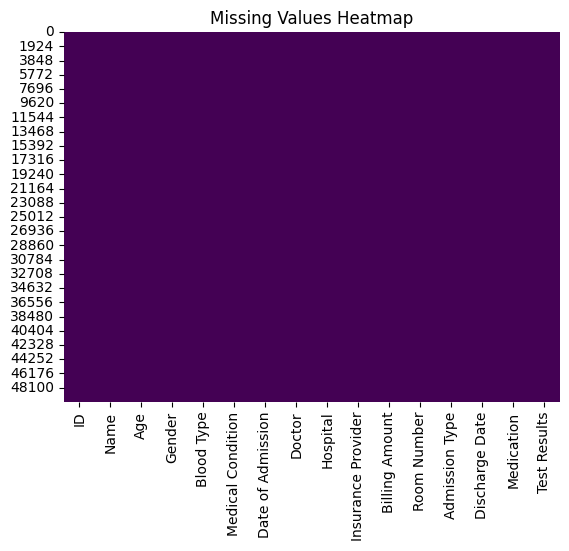

In [29]:
# Visualize missing values -> No Nulls
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [30]:
df['Name'] = df['Name'].str.title()

print(df['Name'].head())

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object


In [31]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df['Gender'].nunique()

2

In [33]:
df = pd.get_dummies(df, columns=['Gender'])

In [34]:
print(df['Gender_Male'].head())

0    False
1    False
2    False
3     True
4    False
Name: Gender_Male, dtype: bool


In [35]:
df['Blood Type'].unique()

array(['O-', 'A+', 'AB-', 'B-', 'O+', 'A-', 'AB+', 'B+'], dtype=object)

In [36]:
df = pd.get_dummies(df, columns=['Blood Type'])

In [37]:
print(df['Blood Type_A-'].head())

0    False
1    False
2    False
3    False
4    False
Name: Blood Type_A-, dtype: bool


In [38]:
df['Medical Condition'].unique()

array(['Asthma', 'Cancer', 'Hypertension', 'Diabetes', 'Obesity',
       'Arthritis'], dtype=object)

In [39]:
df = pd.get_dummies(df, columns=['Medical Condition'])

In [40]:
print(df['Medical Condition_Cancer'].head())

0    False
1     True
2    False
3    False
4    False
Name: Medical Condition_Cancer, dtype: bool


In [41]:
df['Date of Admission'].unique()

array(['06/06/2022', '19/11/2021', '05/03/2022', ..., '23/05/2022',
       '15/11/2022', '14/10/2024'], dtype=object)

In [42]:
# The correct way to check and sum null values is to call isnull() as a method first
df['Date of Admission'].isnull().sum()

np.int64(0)

In [43]:
df['Discharge Date'].isnull().sum()

np.int64(0)

In [44]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce', dayfirst=True)


In [45]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce', dayfirst=True)


In [46]:
print(df['Date of Admission'].head())

0   2022-06-06
1   2021-11-19
2   2022-03-05
3   2020-04-06
4   2022-12-31
Name: Date of Admission, dtype: datetime64[ns]


In [47]:
print(df['Discharge Date'].head())

0   2022-08-18
1   2021-11-20
2   2022-05-16
3   2020-04-26
4   2023-02-11
Name: Discharge Date, dtype: datetime64[ns]


In [48]:
df['Doctor'] = df['Doctor'].str.title()

print(df['Doctor'].head())

0    Mark Hartman Jr.
1    Angela Contreras
2          David Ruiz
3      Jenny Griffith
4       Cynthia Scott
Name: Doctor, dtype: object


In [49]:
df['Hospital'] = df['Hospital'].str.title()

print(df['Hospital'].head())

0    Sons And Miller
1        White-White
2    Group Middleton
3    Morris-Arellano
4     Williams-Davis
Name: Hospital, dtype: object


In [50]:
df['Insurance Provider'].unique()

array(['Cigna', 'Medicare', 'Blue Cross', 'UnitedHealthcare', 'Aetna'],
      dtype=object)

In [51]:
df = pd.get_dummies(df, columns=['Insurance Provider'])

In [52]:
print(df['Insurance Provider_Blue Cross'].head())

0    False
1    False
2    False
3     True
4     True
Name: Insurance Provider_Blue Cross, dtype: bool


In [53]:
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [54]:
df = pd.get_dummies(df, columns=['Admission Type'])

In [55]:
print(df['Admission Type_Emergency'].head())

0    False
1    False
2     True
3    False
4     True
Name: Admission Type_Emergency, dtype: bool


In [56]:
df['Medication'].unique()

array(['Ibuprofen', 'Paracetamol', 'Penicillin', 'Aspirin', 'Lipitor'],
      dtype=object)

In [57]:
df = pd.get_dummies(df, columns=['Medication'])

In [58]:
print(df['Medication_Paracetamol'].head())

0    False
1    False
2     True
3    False
4    False
Name: Medication_Paracetamol, dtype: bool


### Data Preprocessing

In [59]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [60]:
df['Billing_Is_Negative'] = df['Billing Amount'] < 0
df['Billing Amount'] = df['Billing Amount'].abs()

In [61]:
# Add a flag for negative values
df['Billing_Is_Negative'] = df['Billing Amount'] < 0

# Convert billing amount to positive for modeling
df['Billing Amount'] = df['Billing Amount'].abs()

In [62]:
df['Name'] = df['Name'].str.strip()
df['Name'] = df['Name'].str.replace(r'\s+', '_', regex=True)

In [63]:
df['Doctor'] = df['Doctor'].str.strip()
df['Doctor'] = df['Doctor'].str.replace(r'\s+', '_', regex=True)

In [64]:
df['Hospital'] = df['Hospital'].str.strip()
df['Hospital'] = df['Hospital'].str.replace(r'\s+', '_', regex=True)

In [65]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [66]:
test_results_map = {'Normal': 0, 'Inconclusive': 1, 'Abnormal': 2}

# Apply the mapping
df['Test Results'] = df['Test Results'].map(test_results_map)

In [67]:
print(df['Test Results'].head)

<bound method NDFrame.head of 0        0
1        1
2        0
3        2
4        2
        ..
49995    1
49996    2
49997    2
49998    2
49999    1
Name: Test Results, Length: 50000, dtype: int64>


Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489156
Insurance Provider_Blue Cross          0.482841
Room Number                            0.283464
Medical Condition_Asthma               0.186281
Blood Type_AB-                         0.130850
Medical Condition_Diabetes             0.128517
Blood Type_O+                          0.093200
Gender_Male                            0.084318
Blood Type_A-                          0.082569
Blood Type_O-                          0.068833
Medication_Aspirin                     0.056190
Medication_Ibuprofen                   0.047753
Age                                    0.047194
Medication_Paracetamol                 0.028803
Insurance Provider_UnitedHealthcare    0.020748
Medication_Lipitor                     0.012215
Medical Condition_Arthritis            0.007683
Blood Type_AB+                        -0.001287
ID                                    -0.005527
Blood 

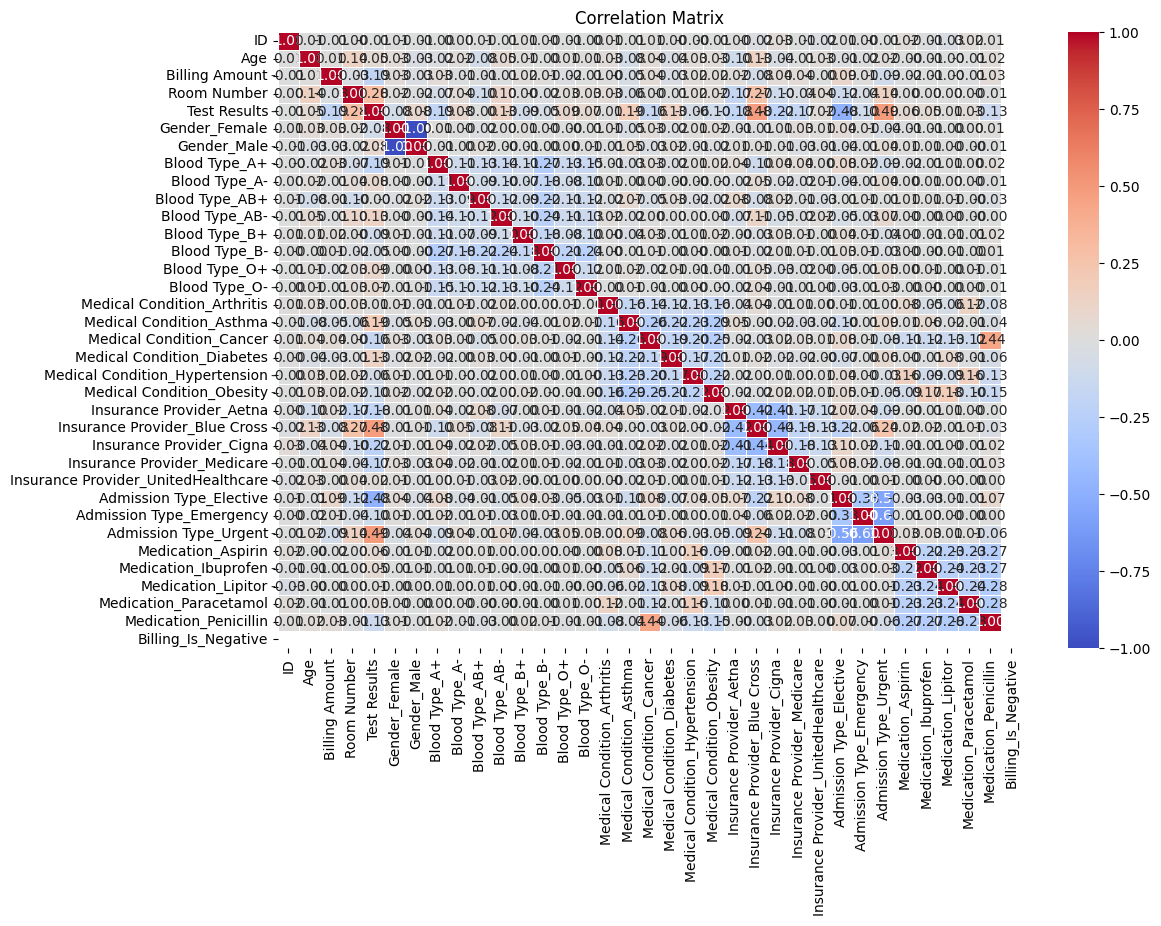

In [68]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

# Optional: Heatmap of the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Normalization

In [69]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
billing_amount_values = df['Billing Amount'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_billing_amount = scaler.fit_transform(billing_amount_values)

# Update the 'Billing Amount' column in the DataFrame
df['Billing Amount'] = normalized_billing_amount

In [70]:
print(df['Billing Amount'].head())

0    0.207798
1    0.116420
2    0.406091
3    0.710102
4    0.159484
Name: Billing Amount, dtype: float64


In [71]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
age_values = df['Age'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_age = scaler.fit_transform(age_values)

# Update the 'Billing Amount' column in the DataFrame
df['Age'] = normalized_age

In [72]:
print(df['Age'].head())

0    0.27
1    0.68
2    0.21
3    0.91
4    0.52
Name: Age, dtype: float64


In [73]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489156
Insurance Provider_Blue Cross          0.482841
Room Number                            0.283464
Medical Condition_Asthma               0.186281
Blood Type_AB-                         0.130850
Medical Condition_Diabetes             0.128517
Blood Type_O+                          0.093200
Gender_Male                            0.084318
Blood Type_A-                          0.082569
Blood Type_O-                          0.068833
Medication_Aspirin                     0.056190
Medication_Ibuprofen                   0.047753
Age                                    0.047194
Medication_Paracetamol                 0.028803
Insurance Provider_UnitedHealthcare    0.020748
Medication_Lipitor                     0.012215
Medical Condition_Arthritis            0.007683
Blood Type_AB+                        -0.001287
ID                                    -0.005527
Blood 

### Dropping Unnecessary Columns

In [74]:
df = df.drop('ID', axis=1)

In [75]:
df = df.drop('Name', axis=1)

In [76]:
df = df.drop('Room Number', axis=1)

In [77]:
df['Days Spent'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [78]:
df = df.drop('Discharge Date', axis=1)

In [79]:
df = df.drop('Date of Admission', axis=1)

In [80]:
print(df['Days Spent'].head())

0    73
1     1
2    72
3    20
4    42
Name: Days Spent, dtype: int64


### Correlation Matrix

In [81]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Admission Type_Urgent                  0.489156
Insurance Provider_Blue Cross          0.482841
Medical Condition_Asthma               0.186281
Blood Type_AB-                         0.130850
Medical Condition_Diabetes             0.128517
Blood Type_O+                          0.093200
Gender_Male                            0.084318
Blood Type_A-                          0.082569
Blood Type_O-                          0.068833
Medication_Aspirin                     0.056190
Medication_Ibuprofen                   0.047753
Age                                    0.047194
Medication_Paracetamol                 0.028803
Insurance Provider_UnitedHealthcare    0.020748
Medication_Lipitor                     0.012215
Medical Condition_Arthritis            0.007683
Blood Type_AB+                        -0.001287
Blood Type_B-                         -0.054181
Medical Condition_Hypertension        -0.057349
Gender

In [82]:
df = df.drop('Billing_Is_Negative', axis=1)

## Checking Outliers

In [83]:
Q1 = df['Days Spent'].quantile(0.25)
Q3 = df['Days Spent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Days Spent'] < lower_bound) | (df['Days Spent'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


## MinMax Scaller

In [84]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
days_spent_values = df['Days Spent'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_days_spent = scaler.fit_transform(days_spent_values)

# Update the 'Billing Amount' column in the DataFrame
df['Days Spent'] = normalized_days_spent

In [85]:
print(df['Days Spent'].head())

0    0.732673
1    0.019802
2    0.722772
3    0.207921
4    0.425743
Name: Days Spent, dtype: float64


In [86]:
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

                Age  Billing Amount  Test Results    Days Spent
count  50000.000000    50000.000000  50000.000000  50000.000000
mean       0.458637        0.427529      1.001760      0.432198
std        0.244161        0.253934      0.818004      0.255971
min        0.000000        0.000000      0.000000      0.000000
25%        0.260000        0.212971      0.000000      0.217822
50%        0.450000        0.426614      1.000000      0.425743
75%        0.650000        0.632127      2.000000      0.633663
max        1.000000        1.000000      2.000000      1.000000


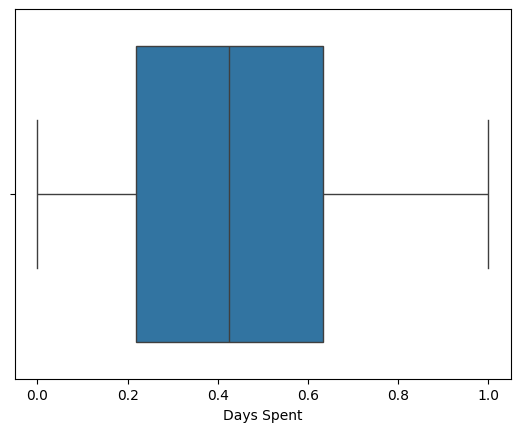

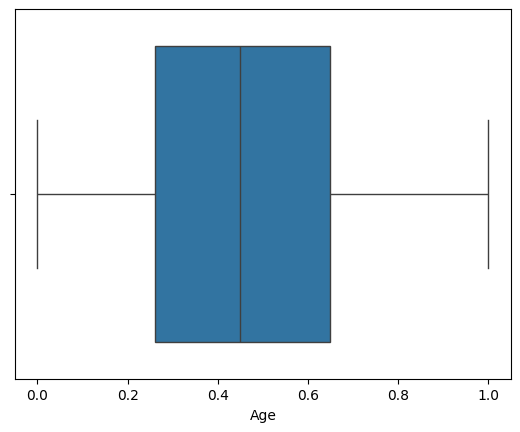

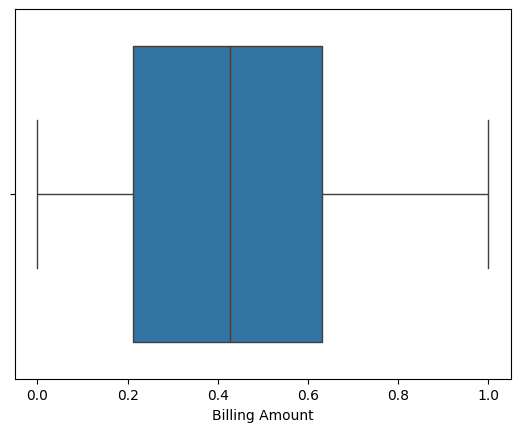

In [87]:
# Checking outliers by using box plots
sns.boxplot(x=df['Days Spent'])
plt.show()

sns.boxplot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Billing Amount'])
plt.show()

## Histogram Plotting

<Axes: xlabel='Age', ylabel='Count'>

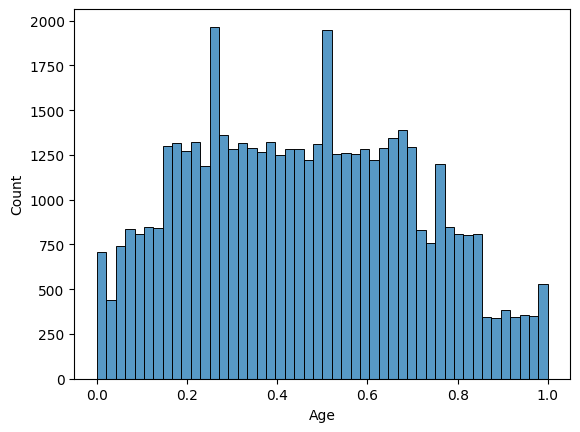

In [88]:
sns.histplot(df['Age'])

<Axes: xlabel='Billing Amount', ylabel='Count'>

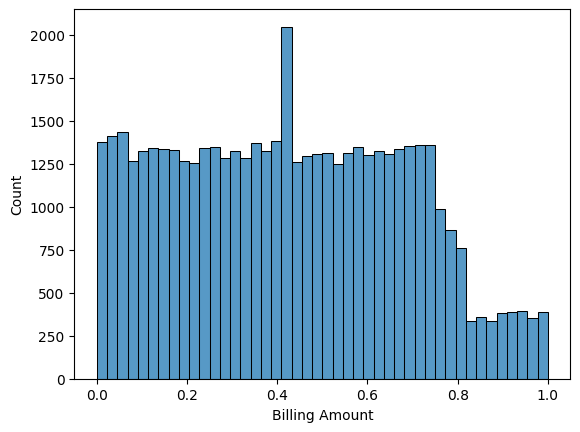

In [89]:
sns.histplot(df['Billing Amount'])

<Axes: xlabel='Days Spent', ylabel='Count'>

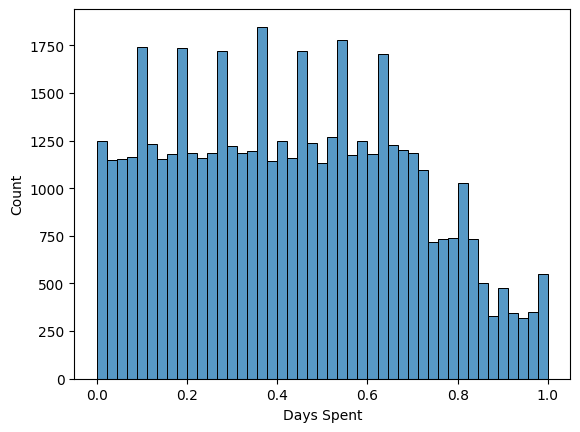

In [90]:
sns.histplot(df['Days Spent'])

## Box Plot

<Axes: ylabel='Age'>

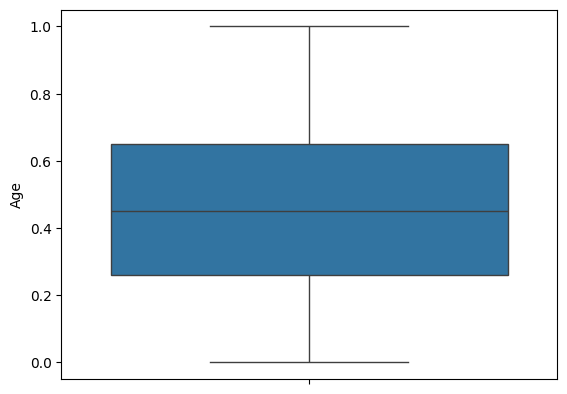

In [91]:
sns.boxplot(y=df['Age'])

<Axes: ylabel='Billing Amount'>

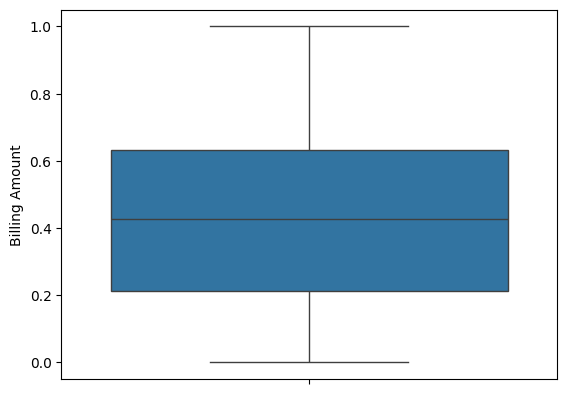

In [92]:
sns.boxplot(y=df['Billing Amount'])

<Axes: ylabel='Days Spent'>

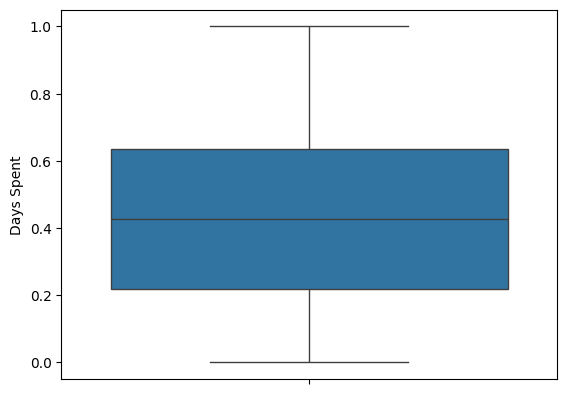

In [93]:
sns.boxplot(y=df['Days Spent'])

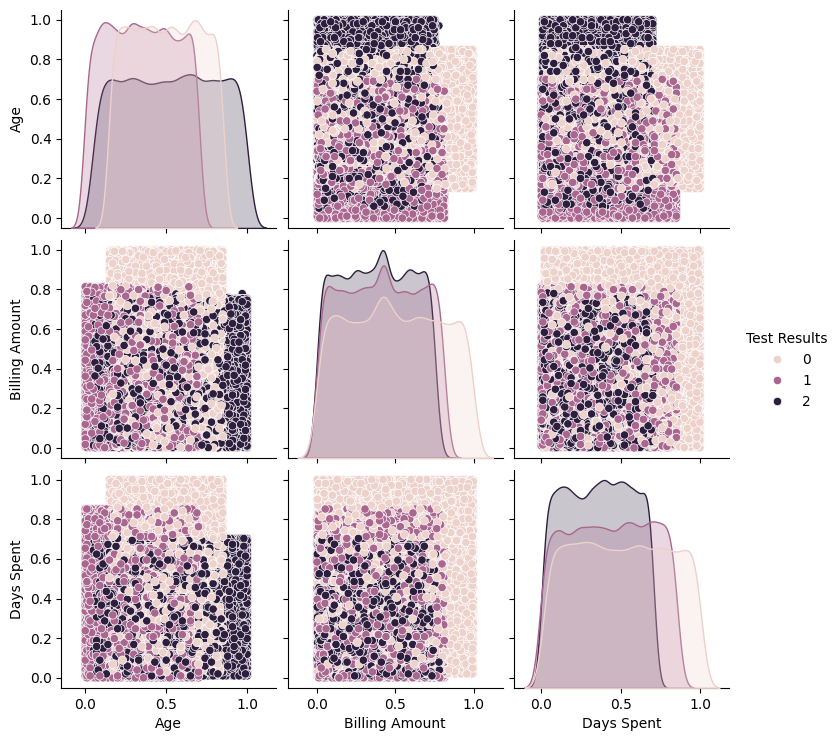

In [94]:
# Pair Plot -> Shows the relationships between all pairs of numeric features, colored by the target.
import seaborn as sns
sns.pairplot(df[['Age', 'Billing Amount', 'Days Spent', 'Test Results']], hue='Test Results')
plt.show()


Checking the relationship between the hospital and the doctors to the test dataset

In [95]:
df_test = pd.read_csv('/content/test data.csv')

In [96]:
common_doctors = df['Doctor'].isin(df_test['Doctor']).any()

In [97]:
common_doctors.shape

()

Checking for any similarities in both features

In [98]:
df = df.drop('Doctor', axis=1)

In [99]:
common_hospitals = df['Hospital'].isin(df_test['Hospital']).any()

In [100]:
common_hospitals.size

1

In [101]:
df = df.drop('Hospital', axis=1)

In [102]:
df.to_csv("Training_Set_Preprocessed_Final.csv", index=False)

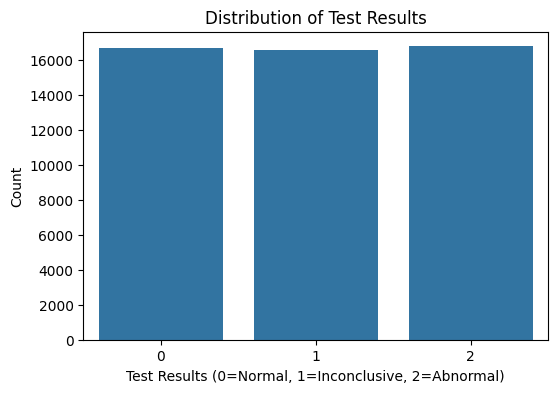

In [103]:
# Target Variable Distribution (Test Results)
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.xlabel("Test Results (0=Normal, 1=Inconclusive, 2=Abnormal)")
plt.ylabel("Count")
plt.show()

In [104]:
test_results_df = df[['Test Results']].copy()

df = df.drop('Test Results', axis=1)

## PCA
Adding PCA to the code and saving it into a csv file

In [105]:
# Step 1: Convert boolean to integers
df = df.copy()
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

# Step 2: Apply PCA
pca = PCA(n_components=25)  # or however many components you want
pca_result = pca.fit_transform(df)

# Step 3: Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'])

# Optional: view explained variance
print(pca.explained_variance_ratio_)

[0.11148854 0.09736612 0.06790736 0.0654839  0.06225444 0.05588367
 0.05506607 0.05232906 0.04518625 0.04176095 0.04140451 0.03283665
 0.02838862 0.0278242  0.02573986 0.02544281 0.02293297 0.02090794
 0.01961209 0.01884968 0.01641076 0.01481053 0.01420767 0.01383973
 0.01267778]


In [106]:
# Merge the 'Test Results' DataFrame with the PCA results DataFrame
merged_df = pd.concat([pca_df, test_results_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.739999 -0.387233 -0.082191  0.724498 -0.357816 -0.248829 -0.371327   
1  0.855787 -0.490957  0.486768  0.646321 -0.130620  0.268629 -0.349997   
2  0.785246 -0.349890 -0.480877 -0.150691  0.572419 -0.625231 -0.402409   
3 -1.105778  0.776672 -0.033946  0.050035  0.371544  0.388944 -0.247190   
4  0.644737  0.043332  0.339262 -0.560006  1.116415  0.002315 -0.444872   

        PC8       PC9      PC10  ...      PC17      PC18      PC19      PC20  \
0 -0.141035  1.350790  0.118606  ... -0.385882 -0.038614 -0.123614 -0.024101   
1  0.087884  0.698831 -0.278329  ... -0.223581 -0.073168 -0.244492 -0.136205   
2  0.693038 -0.363113 -0.581929  ... -0.081427 -0.146072  0.925532 -0.298989   
3  0.027519  0.289747 -0.331156  ... -0.534285 -0.072597 -0.058387 -0.108144   
4 -0.128955 -0.194878  0.080142  ... -0.161804 -0.088031 -0.184259  0.020053   

       PC21      PC22      PC23      PC24      PC25  Test Results  


In [107]:
merged_df.to_csv("PCA_Training_Set_Preprocessed_Final.csv", index=False)

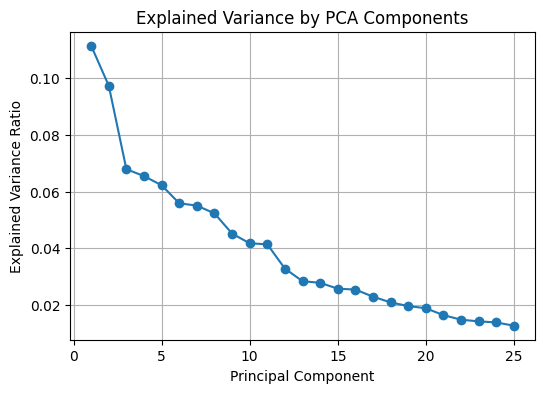

In [108]:
# shows how much variance each principal component captures

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

## Duplicates
Checking if there is any duplicates in the dataset and dropping them

In [109]:
duplicates = df.duplicated()

In [110]:
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df.shape

(50000, 32)